# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")

# Display the data table for preview
combined_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(combined_study_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_study_df.duplicated(["Mouse ID","Timepoint"])

duplicated_mice_Id = combined_study_df.loc[duplicated_mice,"Mouse ID"].unique()
duplicated_mice_Id 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_Id_data = combined_study_df.loc[combined_study_df["Mouse ID"].isin(duplicated_mice_Id)]
duplicated_Id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_study_df.loc[combined_study_df["Mouse ID"].isin(duplicated_mice_Id) == False]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
final_mice_count = len(cleaned_data["Mouse ID"].unique())
final_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#cleaned_data.describe()

mean_tumor_volume = cleaned_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = cleaned_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_variance = cleaned_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_std_dev = cleaned_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_std_err = cleaned_data.groupby(cleaned_data["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_table = {"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, 
                 "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Std. Dev.": tumor_volume_std_dev,
                 "Tumor Volume Std. Err.": tumor_volume_std_err}
                

summary_table = pd.DataFrame(summary_table, columns=["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", 
                                                      "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."])
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_statistics = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})
summary_statistics.style.set_properties(**{'text-align':'right'})

## Bar and Pie Charts

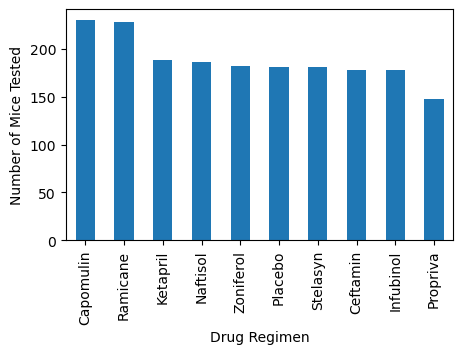

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = cleaned_data.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending = False ) 

mice_tested.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested", figsize=(5,3)) 
plt.show()

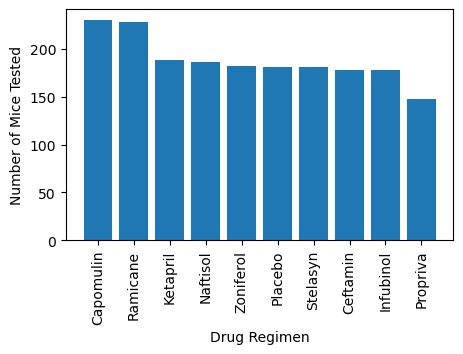

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mice_tested))          
tick_location = [value for value in x_axis]   

plt.figure(figsize=(5,3))

plt.bar(x_axis, mice_tested,align="center")
plt.xticks(tick_location, mice_tested.index, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

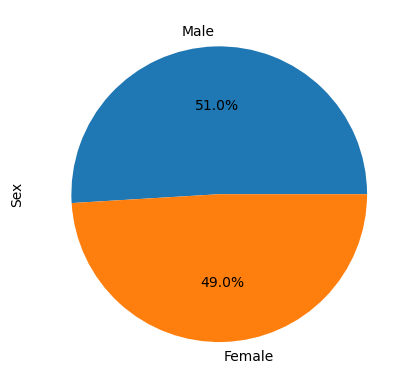

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = cleaned_data.groupby("Sex").count()["Mouse ID"].sort_values(ascending = False ) 
male_female.plot(kind="pie", autopct="%1.1f%%",ylabel="Sex" ) 
plt.show()


Text(0, 0.5, 'Sex')

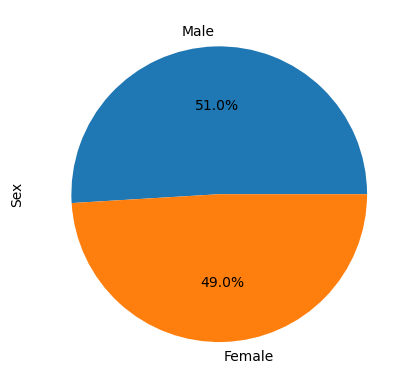

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_female, labels = male_female.index, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor = final_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(final_tumor, cleaned_data, how = "left", on=["Mouse ID","Timepoint"])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    selected_output = merged_data.loc[merged_data["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
      
    # add subset 
    tumor_volume.append(selected_output)
    
    # Determine outliers using upper and lower bounds
    quartiles = selected_output.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers =selected_output.loc[(selected_output < lower_bound) | (selected_output> upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}") 

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


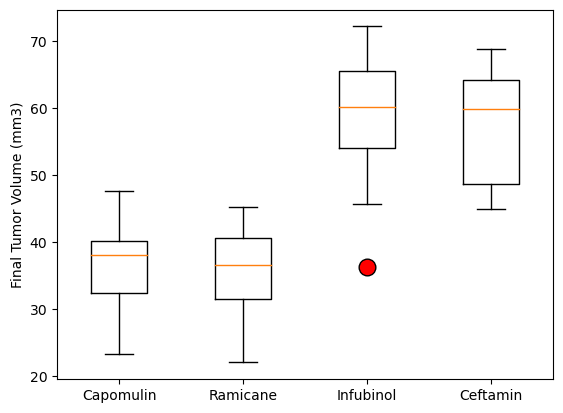

In [15]:
#plt.boxplot(tumor_vol_list, labels = treatment_list)
flierprops = dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumor_volume, labels = treatment, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

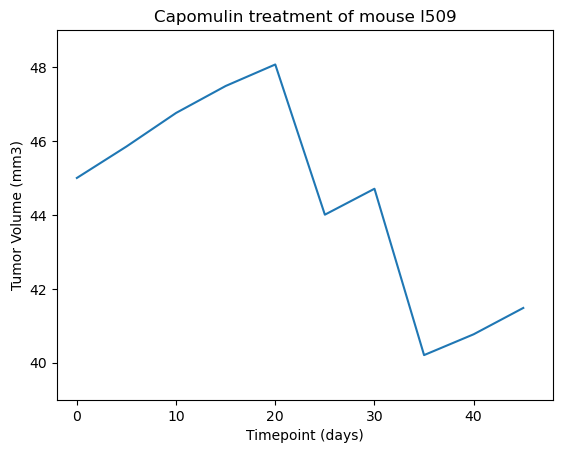

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_drug = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin",:]
Capomulin_drug_l509 = Capomulin_drug.loc[Capomulin_drug["Mouse ID"] == "l509",:]
Timepoint = Capomulin_drug_l509["Timepoint"]
tumor_volume = Capomulin_drug_l509["Tumor Volume (mm3)"]

plt.plot(Timepoint, tumor_volume)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(-2,48)
plt.ylim(39,49)
plt.show()

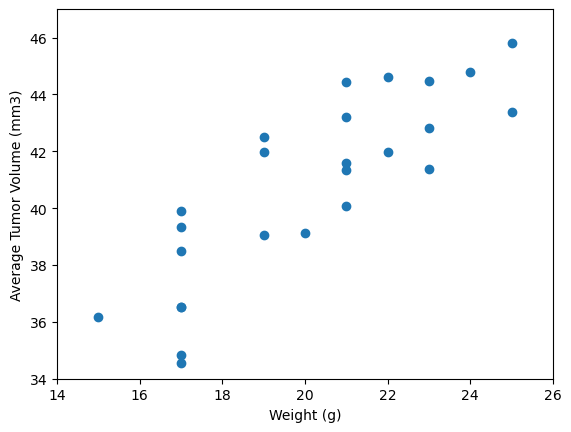

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
averaged_Capomulin_drug = Capomulin_drug.groupby(["Mouse ID"]).mean()
average_weight = averaged_Capomulin_drug["Weight (g)"]
average_tumor_volume = averaged_Capomulin_drug["Tumor Volume (mm3)"]

plt.scatter(average_weight,average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.xlim(14,26)
plt.ylim(34,47)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


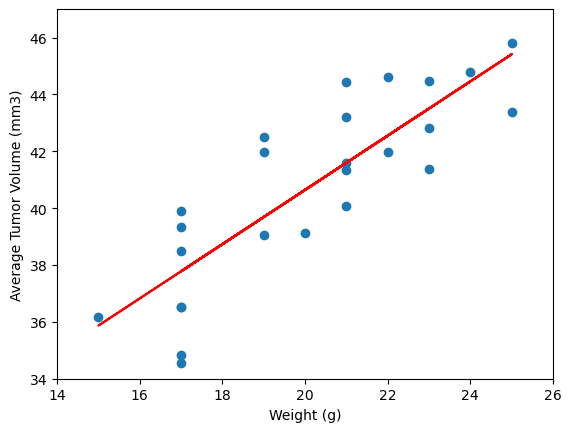

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(average_weight,average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(average_weight,average_tumor_volume)
regress_values = average_weight * slope + intercept

plt.scatter(average_weight,average_tumor_volume)
plt.plot(average_weight,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.xlim(14,26)
plt.ylim(34,47)
plt.show()